# CLT with dice

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

In [2]:
def throwOneDie(HowOften):
    flatRandom = np.random.random(HowOften) # gives me a numpy array
    #turn it into integers from 1 to 6:
    return np.trunc(flatRandom*6)+1  #numpy way of saying: return [int(x*6)+1 for x in flatRandom]

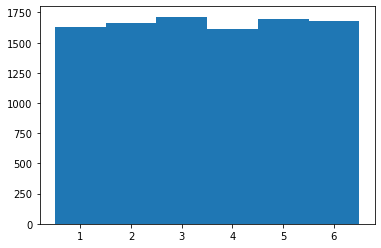

In [3]:
oneDieRandom = throwOneDie(10000)
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [4]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [5]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.5116 , sigma =  1.7048358982611787


Now let's throw multiple dice

In [6]:
def sumMultiRandom(PDF, NDice=10, Nevents=1000): 
    # we'll write it such that we can give it various PDFs, not just dice
    # For dice we'll pass throwOneDie as first argument
    randomNumbers=PDF(Nevents)
    if NDice == 1: return randomNumbers
    
    for counter in range(NDice-1):
        randomNumbers += PDF(Nevents)  
        ## above line is the numpy way of saying
        ## newRandomNumbers = PDF(Nevents)
        ## randomNumbers = [x + y for x, y in zip(randomNumbers, newRandomNumbers)]
    return randomNumbers

We'll also need to be able to draw a Gaussian, for comparison

In [7]:
def gauss(x, mean, sigma):
    Del = (x-mean)/sigma
    return 1.0/(np.sqrt(2*pi)*sigma)  *  np.exp(-0.5*Del*Del)

Now let's put it all together in one neat function

In [8]:
def doAll(PDF, NDice=1, Nevents=1000, histoBins=-1, histoMin=999, histoMax=-999, showGauss=0, chi2=0, average=0):

    RandomDice = sumMultiRandom(PDF, NDice=NDice, Nevents=Nevents)
    if average:
        RandomDice /= NDice  # RandomDice a numpy array so this means every element will be divided by NDice
    mini=histoMin
    maxi=histoMax

    if(histoMax < histoMin):
        mini=NDice -0.5
        maxi=NDice*6 + 0.5
        if average:
            mini /= NDice
            maxi /= NDice
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi - mini)
    if average: bins=int((maxi-mini)*NDice)
        
    if histoBins > 0 : bins=histoBins
    
    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram

    mu, var, sigma = meanAndStdev(RandomDice)
    
    if showGauss:
        oversampling=10
        dx = (maxi-mini)/bins
        xArray=np.arange(mini, maxi, dx/oversampling)
        plt.plot(xArray,gauss(xArray, mu, sigma)*dx*Nevents)

    plt.show()
    
    print("For ", NDice, " random numbers added ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)
    
    if chi2:
        N=fsum(h[0])
        chi2sum=0
        for Nbin, bin_low, bin_up in zip(h[0], h[1], h[1][1:]):
            ##print(Nbins, ", ", bin_low, ", ", bin_up)
            binCentre=0.5*(bin_low + bin_up)
            binWidth= bin_up - bin_low
            theory=N*binWidth*gauss(binCentre, mu, sigma)
            measured=Nbin
            error_squared=theory
            chi2sum += (theory-measured)**2/error_squared
        Nbins=len(h[0])
        print("chi2 = ", chi2sum, " for ", Nbins, " bins; chi2/bin = ", chi2sum/Nbins)

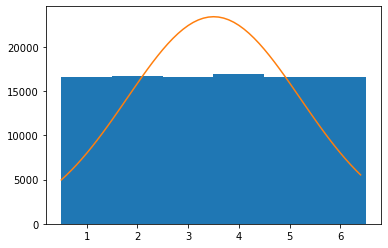

For  1  random numbers added  100000  times:
mean =  3.50315 , variance =  2.9077700774999986 , sigma =  1.705218483802002


In [9]:
doAll(throwOneDie, 1, 100000, showGauss=1)

###### Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected, and let's also compare it to a Gaussian

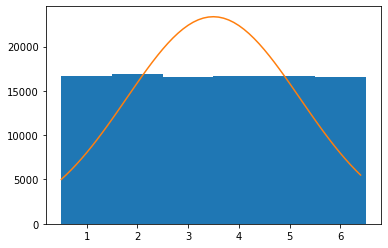

For  1  random numbers added  100000  times:
mean =  3.49599 , variance =  2.9151039199 , sigma =  1.707367540953031


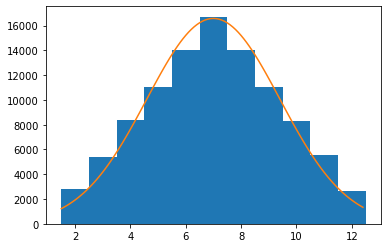

For  2  random numbers added  100000  times:
mean =  6.99544 , variance =  5.794759206399995 , sigma =  2.407230609310208


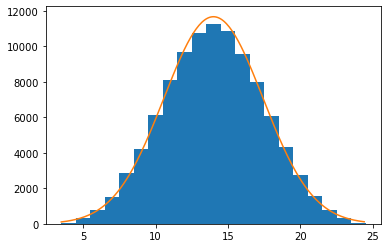

For  4  random numbers added  100000  times:
mean =  13.99806 , variance =  11.692476236399983 , sigma =  3.4194263022325813


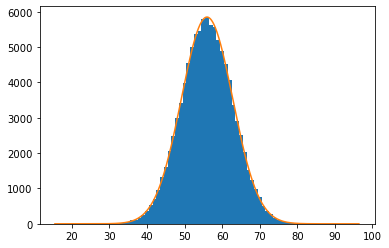

For  16  random numbers added  100000  times:
mean =  55.97417 , variance =  46.47030281110028 , sigma =  6.816912997178435


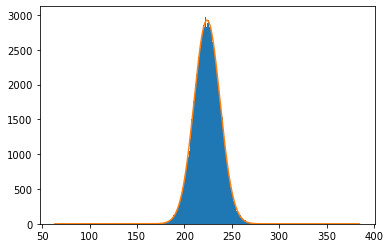

For  64  random numbers added  100000  times:
mean =  223.95672 , variance =  185.86204684160475 , sigma =  13.633123150679918


In [10]:
doAll(throwOneDie,  1, 100000, showGauss=1)
doAll(throwOneDie,  2, 100000, showGauss=1)
doAll(throwOneDie,  4, 100000, showGauss=1)
doAll(throwOneDie, 16, 100000, showGauss=1)
doAll(throwOneDie, 64, 100000, showGauss=1)

What happens if we average, instead of sum? According to the lectures, the mean should stay constant, but the variance should go down with NDice (and the standard deviation with \sqrt{NDICE}. Let's check:

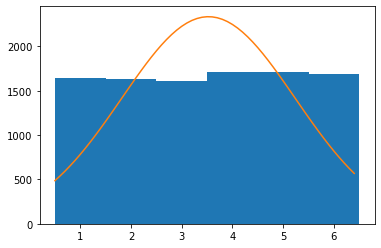

For  1  random numbers added  10000  times:
mean =  3.5268 , variance =  2.920681759999999 , sigma =  1.709000222352238


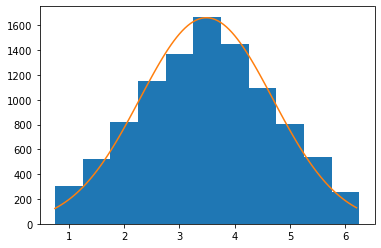

For  2  random numbers added  10000  times:
mean =  3.48615 , variance =  1.442283177500002 , sigma =  1.2009509471664537


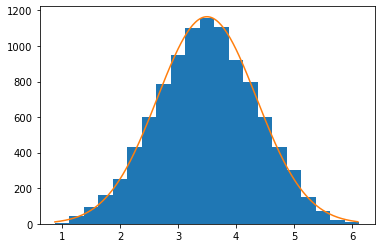

For  4  random numbers added  10000  times:
mean =  3.49735 , variance =  0.733867977500001 , sigma =  0.8566609466410856


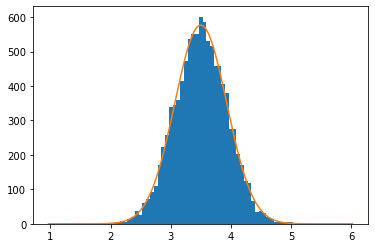

For  16  random numbers added  10000  times:
mean =  3.50056875 , variance =  0.1870492858984374 , sigma =  0.43249194894059867


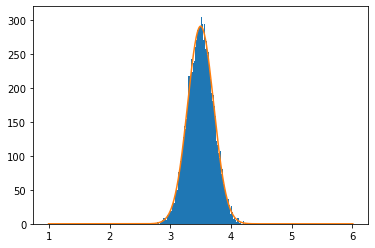

For  64  random numbers added  10000  times:
mean =  3.4983984375 , variance =  0.04585429534911967 , sigma =  0.21413616076954323


In [11]:
doAll(throwOneDie,  1, 10000, showGauss=1, average=1)
doAll(throwOneDie,  2, 10000, showGauss=1, average=1)
doAll(throwOneDie,  4, 10000, showGauss=1, average=1)
doAll(throwOneDie, 16, 10000, showGauss=1, average=1)
doAll(throwOneDie, 64, 10000, showGauss=1, average=1)

So... averaging clearly is good for you - the error goes down with 1/sqrt(N), where N is the number of experiments (here: throws of a die) that you average over.

Does it also work with other distributions? Let's try a triangular shaped one

In [12]:
def throwTriangle(HowOften):
    flat = np.random.random(HowOften)
    ## we'll use a coordinate transformation to make a triangular distribution
    triangleRandom = np.sqrt(flat)  # this is the numpy way of saying: triangleRandom = [sqrt(x) for x in flat]
    #turn it into integers from 1 to 6: (not really needed, but why not) and return
    return np.trunc(triangleRandom*6) + 1  # numpy version of:  return [int(x*6)+1 for x in triangleRandom]
# note that I am turing the random numbers into integers between 1 and 6 simply to keep the
# analogy to the dice. There is no other reason for this.
# For demonstrating the CLT. real numbers are just fine.
# - the the exponential example further down for an example with real numbers.


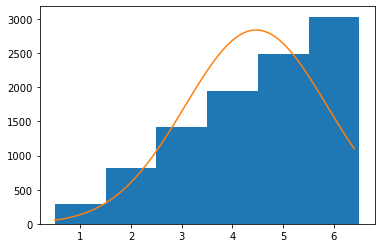

For  1  random numbers added  10000  times:
mean =  4.4659 , variance =  1.9698371899999962 , sigma =  1.4035088849024064


In [13]:
doAll(throwTriangle, 1, 10000, showGauss=1)

and for now summing triangles:

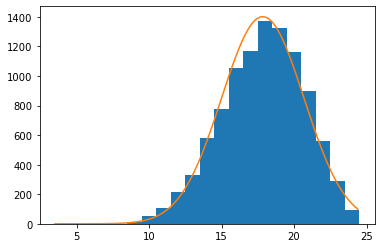

For  4  random numbers added  10000  times:
mean =  17.8398 , variance =  8.102535959999955 , sigma =  2.8464953820443752


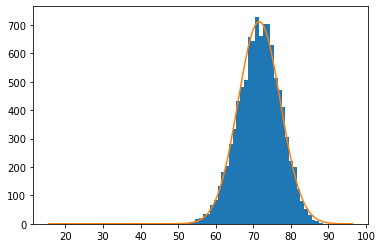

For  16  random numbers added  10000  times:
mean =  71.5549 , variance =  31.409785989999364 , sigma =  5.604443414827146


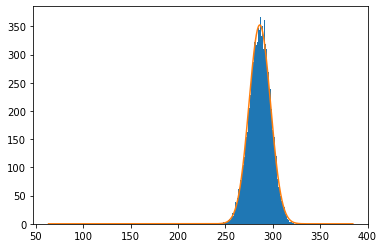

For  64  random numbers added  10000  times:
mean =  286.2646 , variance =  128.16998684001737 , sigma =  11.321218434427337


In [14]:
doAll(throwTriangle,  4, 10000, showGauss=1)
doAll(throwTriangle, 16, 10000, showGauss=1)
doAll(throwTriangle, 64, 10000, showGauss=1)

...and averaging triangles:

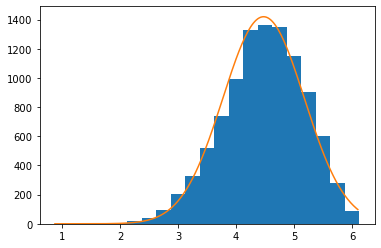

For  4  random numbers added  10000  times:
mean =  4.474275 , variance =  0.49380697437500487 , sigma =  0.7027140061041938


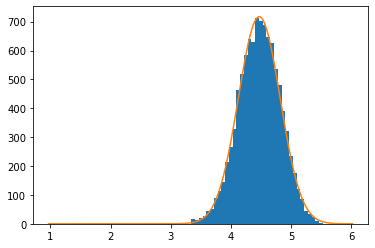

For  16  random numbers added  10000  times:
mean =  4.4731625 , variance =  0.12093365484374985 , sigma =  0.34775516508565313


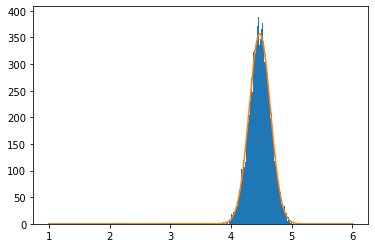

For  64  random numbers added  10000  times:
mean =  4.4729890625 , variance =  0.030448021560058436 , sigma =  0.17449361466844118


In [15]:
doAll(throwTriangle,  4, 10000, showGauss=1, average=1)
doAll(throwTriangle, 16, 10000, showGauss=1, average=1)
doAll(throwTriangle, 64, 10000, showGauss=1, average=1)

So it also works for a distribution as asymmetric and the triangle. Of course it also works for continuous distributions. Let's try an exponential.

In [16]:
def expo(Nevents):
    expoSample = np.random.exponential(scale = 1, size=Nevents)
    return expoSample

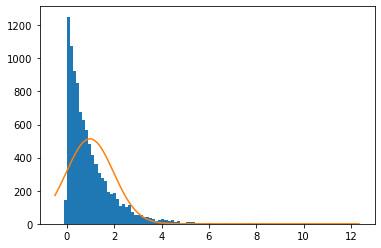

For  1  random numbers added  10000  times:
mean =  0.9780997085567911 , variance =  0.9961844283695582 , sigma =  0.9980903908812859


In [17]:
doAll(expo, 1, 10000, 100, showGauss=1)

Summing exponentials:

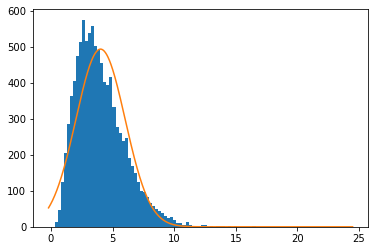

For  4  random numbers added  10000  times:
mean =  4.020945377842561 , variance =  3.974234724709163 , sigma =  1.9935482749883844


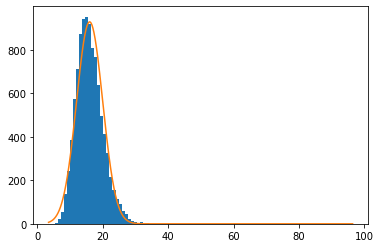

For  16  random numbers added  10000  times:
mean =  15.955668095687901 , variance =  16.009615588849755 , sigma =  4.001201768075406


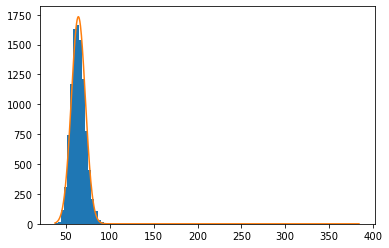

For  64  random numbers added  10000  times:
mean =  64.05316536069027 , variance =  63.849088074269275 , sigma =  7.990562437918202


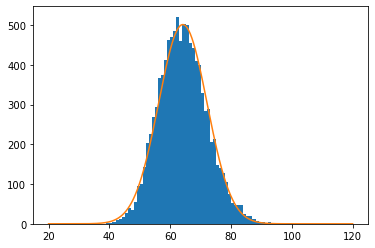

For  64  random numbers added  10000  times:
mean =  64.11565727329763 , variance =  63.352454599868906 , sigma =  7.959425519462376


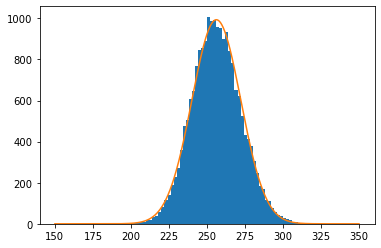

For  256  random numbers added  20000  times:
mean =  256.07500223319187 , variance =  258.04334603513416 , sigma =  16.06372765067729


In [18]:
doAll(expo,   4, 10000, 100, showGauss=1)
doAll(expo,  16, 10000, 100, showGauss=1)
doAll(expo,  64, 10000, 100, showGauss=1)
doAll(expo,  64, 10000, 100,  20, 120, showGauss=1) # zoom in a bit
doAll(expo, 256, 20000, 100, 150, 350, showGauss=1) # this will take a while

... and averaging them:

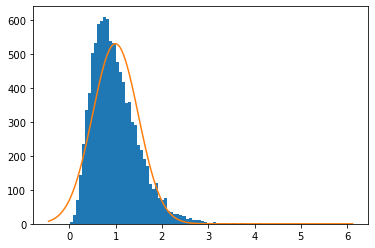

For  4  random numbers added  10000  times:
mean =  0.9949773305922308 , variance =  0.24438402001439363 , sigma =  0.49435212148264684


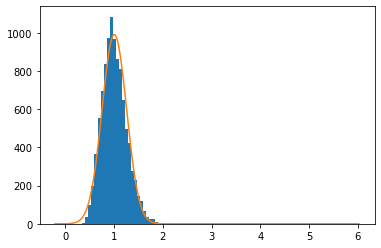

For  16  random numbers added  10000  times:
mean =  1.0043824033770226 , variance =  0.06316341469116282 , sigma =  0.25132332699366133


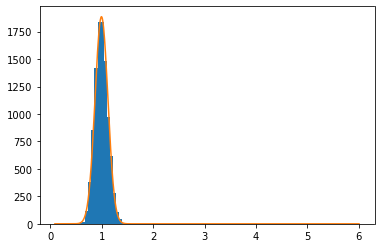

For  64  random numbers added  10000  times:
mean =  0.9976285538403741 , variance =  0.015656908403637093 , sigma =  0.12512756851963955


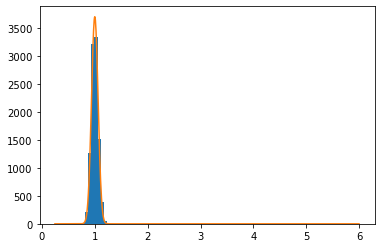

For  256  random numbers added  10000  times:
mean =  1.0002229730320724 , variance =  0.003844306665766517 , sigma =  0.06200247306169744


In [19]:
doAll(expo,   4, 10000, 100, showGauss=1, average=1)
doAll(expo,  16, 10000, 100, showGauss=1, average=1)
doAll(expo,  64, 10000, 100, showGauss=1, average=1)
doAll(expo, 256, 10000, 100, showGauss=1, average=1) # this will take a while

Note that all of the above looks much smoother and nicer with 100,000 rather than 10,000 events; but that'll take a while to run.

# Now repeat with your own probability distribution - can you find one that does not become Gaussian?